In [3]:
# import lib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.datasets import make_moons,make_classification,make_regression,make_circles
import sys
from mpl_toolkits.mplot3d import Axes3D 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA,KernelPCA
np.random.seed(23)
np.set_printoptions(precision=3,suppress=True)
plt.style.use('seaborn')

import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.examples.tutorials.mnist import input_data

def _sym_decorrelation(W):
    """ Symmetric decorrelation
    i.e. W <- (W * W.T) ^{-1/2} * W
    """
    s, u = np.linalg.eigh(np.dot(W, W.T))
    # u (resp. s) contains the eigenvectors (resp. square roots of
    # the eigenvalues) of W * W.T
    return np.dot(np.dot(u * (1./(np.sqrt(s+1e-8))+1e-8), u.T), W)

In [8]:
# import data
mnist = input_data.read_data_sets('../../Dataset/MNIST/', one_hot=True)
train_data,train_label,val_data,val_label,test_data,test_label = mnist.train.images,mnist.train.labels,mnist.validation.images,mnist.validation.labels,mnist.test.images, mnist.test.labels
print(train_data.shape,train_label.shape,train_data.max(),train_data.min())
print(val_data.shape,val_label.shape,val_data.max(),val_data.min())
print(test_data.shape,test_label.shape,test_data.max(),test_data.min())

Extracting ../../Dataset/MNIST/train-images-idx3-ubyte.gz
Extracting ../../Dataset/MNIST/train-labels-idx1-ubyte.gz
Extracting ../../Dataset/MNIST/t10k-images-idx3-ubyte.gz
Extracting ../../Dataset/MNIST/t10k-labels-idx1-ubyte.gz
(55000, 784) (55000, 10) 1.0 0.0
(5000, 784) (5000, 10) 1.0 0.0
(10000, 784) (10000, 10) 1.0 0.0


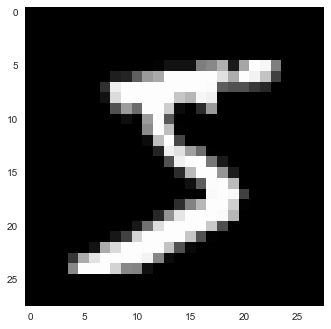

55000.0
5000.0
(array([   0,    1,    2, ..., 4997, 4998, 4999], dtype=int64), array([5, 0, 4, ..., 2, 1, 2], dtype=int64))


In [20]:
plt.imshow(val_data[0].reshape((28,28)),cmap='gray')
plt.grid(False)
plt.show()
print(train_label.sum(0).sum())
print(val_label.sum(0).sum())
print(np.where(val_label==1))

In [17]:
5000/10

500.0